  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)

Tip:  {'tip': 23.674261530405886}


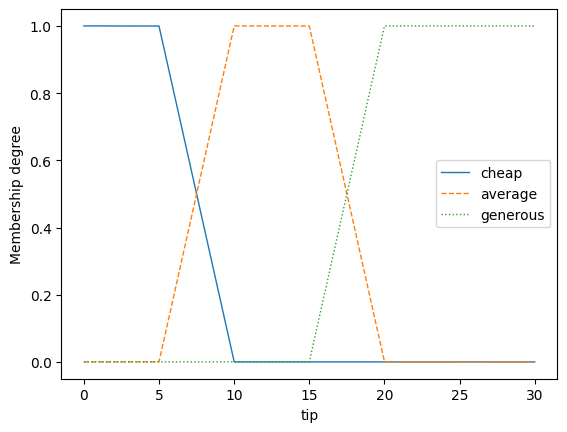

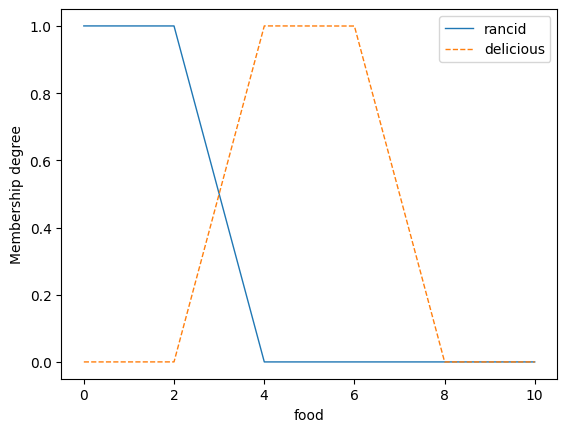

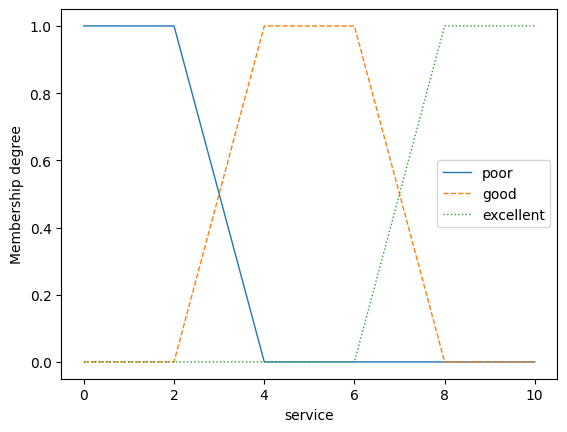

In [48]:
# using simpful library for fuzzy logic in python create a fuzzy tipping controller
# using the following rules:
# if the service is poor or the food is rancid then the tip is cheap
# if the service is good then the tip is average
# if the service is excellent or the food is delicious then the tip is generous
# the inputs are: service and food
# the output is: tip
# the membership functions are: poor, good, excellent for service and rancid, delicious for food
# the universe of discourse for service is: 0 to 10
# the universe of discourse for food is: 0 to 10
# the universe of discourse for tip is: 0 to 25
# the defuzzification method is: centroid

from simpful import *
import numpy as np
import matplotlib.pyplot as plt

# create fuzzy system
fs = FuzzySystem()

# create fuzzy sets and linguistic variables
S_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=2, d=4), term="poor")
S_2 = FuzzySet(function=Trapezoidal_MF(a=2, b=4, c=6, d=8), term="good")
S_3 = FuzzySet(function=Trapezoidal_MF(a=6, b=8, c=10, d=10), term="excellent")
LV1 = LinguisticVariable([S_1, S_2, S_3], concept="service", universe_of_discourse=[0, 10])
fs.add_linguistic_variable("service", LV1)

F_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=2, d=4), term="rancid")
F_2 = FuzzySet(function=Trapezoidal_MF(a=2, b=4, c=6, d=8), term="delicious")
LV2 = LinguisticVariable([F_1, F_2], concept="food", universe_of_discourse=[0, 10])
fs.add_linguistic_variable("food", LV2)

T_1 = FuzzySet(function=Trapezoidal_MF(a=0, b=0, c=5, d=10), term="cheap")
T_2 = FuzzySet(function=Trapezoidal_MF(a=5, b=10, c=15, d=20), term="average")
T_3 = FuzzySet(function=Trapezoidal_MF(a=15, b=20, c=25, d=25), term="generous")
LV3 = LinguisticVariable([T_1, T_2, T_3], concept="tip", universe_of_discourse=[0, 30])
fs.add_linguistic_variable("tip", LV3)

# create fuzzy rules
rule1 = "IF (service IS poor) OR (food IS rancid) THEN (tip IS cheap)"
rule2 = "IF (service IS good) THEN (tip IS average)"
rule3 = "IF (service IS excellent) OR (food IS delicious) THEN (tip IS generous)"
fs.add_rules([rule1, rule2, rule3])

# plot
LV3.plot()
LV2.plot()
LV1.plot()
plt.show()


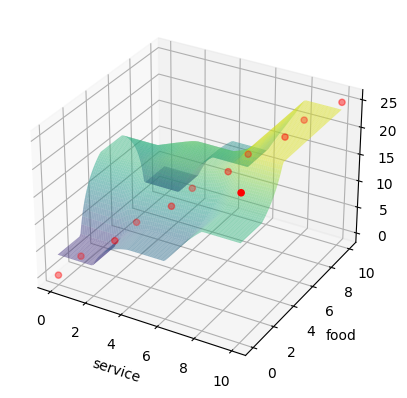

service: 0 food: 0  | tip:  3.88 %
service: 0 food: 2  | tip:  3.88 %
service: 0 food: 4  | tip:  16.25 %
service: 0 food: 6  | tip:  16.25 %
service: 0 food: 8  | tip:  3.88 %
service: 0 food: 10  | tip:  3.88 %

service: 2 food: 0  | tip:  3.88 %
service: 2 food: 2  | tip:  3.88 %
service: 2 food: 4  | tip:  16.25 %
service: 2 food: 6  | tip:  16.25 %
service: 2 food: 8  | tip:  3.88 %
service: 2 food: 10  | tip:  3.88 %

service: 4 food: 0  | tip:  8.9 %
service: 4 food: 2  | tip:  8.9 %
service: 4 food: 4  | tip:  18.78 %
service: 4 food: 6  | tip:  18.78 %
service: 4 food: 8  | tip:  12.5 %
service: 4 food: 10  | tip:  12.5 %

service: 6 food: 0  | tip:  8.9 %
service: 6 food: 2  | tip:  8.9 %
service: 6 food: 4  | tip:  18.78 %
service: 6 food: 6  | tip:  18.78 %
service: 6 food: 8  | tip:  12.5 %
service: 6 food: 10  | tip:  12.5 %

service: 8 food: 0  | tip:  16.25 %
service: 8 food: 2  | tip:  16.25 %
service: 8 food: 4  | tip:  23.67 %
service: 8 food: 6  | tip:  23.67 %
serv

In [61]:
def printTipValue(service, food):
    fs.set_variable("service", service)
    fs.set_variable("food", food)
    print("service:", service, "food:", food," | tip: ", round(fs.inference(["tip"])["tip"],2), "%")

def getTipValue(service, food):
    fs.set_variable("service", service)
    fs.set_variable("food", food)
    return round(fs.inference(["tip"])["tip"],2)

#create a 3d plane plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plot the surface
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
zs = np.array([getTipValue(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', edgecolor='none', antialiased=True, shade=True, linewidth=0.1, zorder=0, rstride=1, cstride=1, vmin=0, vmax=25)

#plot the points
x = [0, 0, 2, 2, 4, 4, 6, 6, 8, 8, 10, 10]
y = [0, 2, 2, 4, 4, 6, 6, 8, 8, 10, 10, 0]
z = [0, 0, 5, 5, 10, 10, 15, 15, 20, 20, 25, 25]
ax.scatter(x, y, z, c='r', marker='o')

#set labels
ax.set_xlabel('service')
ax.set_ylabel('food')
ax.set_zlabel('tip')

plt.show()

for i in range(0, 11, 2):
    for j in range(0, 11, 2):
        printTipValue(i, j)
    print()

